# Lab 07-3 linear regression(with min/max)

* linear regression에 대한 설명 (Data에 대한 표준화 수행)

### 기본 Library 선언 및 Tensorflow 버전 확인

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

tf.set_random_seed(777)  # for reproducibility

print(tf.__version__)

1.12.0


### 표준화를 위한 함수 (최대 최소값이 1과 0이되도록 Scaling한다)

In [2]:
def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # noise term prevents the zero division
    return numerator / (denominator + 1e-7)

### 강의에 설명할 Data입니다
* X Data(feature)의 값은 해당 배열의 첫번째 값부터 4번째 값까지로 정의 되고 Y Data(label)는 해당 배열의 마지막 값을 정의(5번째 값)

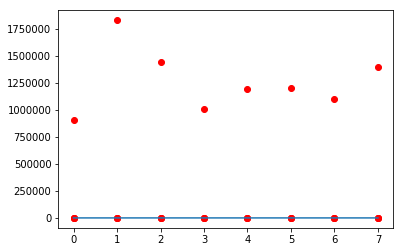

In [3]:
xy = np.array([[828.659973, 833.450012, 908100, 828.349976, 831.659973],
               [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
               [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
               [816, 820.958984, 1008100, 815.48999, 819.23999],
               [819.359985, 823, 1188100, 818.469971, 818.97998],
               [819, 823, 1198100, 816, 820.450012],
               [811.700012, 815.25, 1098100, 809.780029, 813.669983],
               [809.51001, 816.659973, 1398100, 804.539978, 809.559998]])

x_train = xy[:, 0:-1]
y_train = xy[:, [-1]]

plt.plot(x_train, 'ro')
plt.plot(y_train)
plt.show()


* Data에 표준화를 적용하여 실행한다

[[0.99999999 0.99999999 0.         1.         1.        ]
 [0.70548491 0.70439552 1.         0.71881782 0.83755791]
 [0.54412549 0.50274824 0.57608696 0.606468   0.6606331 ]
 [0.33890353 0.31368023 0.10869565 0.45989134 0.43800918]
 [0.51436    0.42582389 0.30434783 0.58504805 0.42624401]
 [0.49556179 0.42582389 0.31521739 0.48131134 0.49276137]
 [0.11436064 0.         0.20652174 0.22007776 0.18597238]
 [0.         0.07747099 0.5326087  0.         0.        ]]


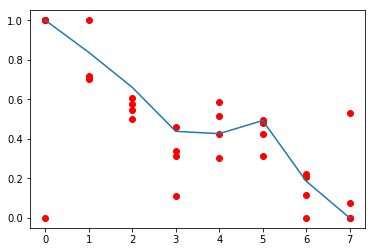

In [4]:
xy = MinMaxScaler(xy)
print(xy)
x_train = xy[:, 0:-1]
y_train = xy[:, [-1]]

plt.plot(x_train, 'ro')
plt.plot(y_train)

plt.show()

##  Tensorflow Session
### 위 Data를 기준으로 Linear Regression 모델을 만들도록 하겠습니다
* Tensorflow data API를 통해 학습시킬 값들을 담는다 (Batch Size는 한번에 학습시킬 Size로 정한다)
* X(features),Y(labels)는 실재 학습에 쓰일 Data (연산을 위해 Type를 맞춰준다)

In [5]:
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(len(x_train)).repeat()

iter = dataset.make_initializable_iterator()
features, labels = iter.get_next()

features = tf.cast(features, tf.float32)
labels = tf.cast(labels, tf.float32)

* W와 b은 학습을 통해 생성되는 모델에 쓰이는 Wegith와 Bias (초기값을 variable : 0이나 Random값으로 가능 tf.random_normal([3, 3],tf.zeros([3,3]) )

In [6]:
W = tf.Variable(tf.random_normal([4, 1]))
b = tf.Variable(tf.random_normal([1]))

* Linear Regression의 Hyphthesis를 정의한다 

In [7]:
hypothesis = tf.matmul(features, W) + b

* 가설을 검증할 Cost 함수를 정의합니다(Mean Square Error를 사용)

In [8]:
cost = tf.reduce_mean(tf.square(hypothesis - labels))

* GradientDescentOptimizer로 학습 실행

In [9]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

### Tensorflow를 통한 실행을 위해 Session을 실행합니다.

In [10]:
EPOCHS = 101

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(EPOCHS):
        sess.run(iter.initializer)
        _, loss_value, hypo_value = sess.run([train, cost, hypothesis])
        print("Iter: {}, Loss: {:.8f}, Prediction: {}".format(step, loss_value, hypo_value))  

Iter: 0, Loss: 0.58788270, Prediction: [[0.1531924 ]
 [0.5237097 ]
 [0.77812946]
 [1.0569346 ]
 [0.8498792 ]
 [0.8095684 ]
 [1.380329  ]
 [1.3357702 ]]
Iter: 1, Loss: 0.58787680, Prediction: [[0.15318716]
 [0.5237012 ]
 [0.7781219 ]
 [1.0569277 ]
 [0.8498722 ]
 [0.80956125]
 [1.3803215 ]
 [1.3357619 ]]
Iter: 2, Loss: 0.58787096, Prediction: [[0.15318167]
 [0.52369285]
 [0.77811426]
 [1.0569209 ]
 [0.84986514]
 [0.8095542 ]
 [1.3803139 ]
 [1.3357534 ]]
Iter: 3, Loss: 0.58786511, Prediction: [[0.15317643]
 [0.52368444]
 [0.7781067 ]
 [1.0569141 ]
 [0.84985805]
 [0.80954707]
 [1.3803064 ]
 [1.335745  ]]
Iter: 4, Loss: 0.58785915, Prediction: [[0.15317118]
 [0.52367616]
 [0.77809906]
 [1.0569073 ]
 [0.849851  ]
 [0.80954003]
 [1.3802987 ]
 [1.3357366 ]]
Iter: 5, Loss: 0.58785331, Prediction: [[0.15316594]
 [0.5236678 ]
 [0.7780913 ]
 [1.0569005 ]
 [0.849844  ]
 [0.809533  ]
 [1.3802912 ]
 [1.3357282 ]]
Iter: 6, Loss: 0.58784747, Prediction: [[0.15316045]
 [0.52365947]
 [0.77808374]
 [1.056